In [ ]:
# here we will import the libraries used for machine learning
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import Imputer  # dealing with NaN
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn import svm, datasets # for Support Vector Machine
from sklearn.svm import SVC


## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Using TensorFlow backend.


In [ ]:
data = pd.read_csv("cervical_cancer2.csv")

In [ ]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.Biopsy.unique()

array([0, 1])

In [ ]:
data[data == '?'] = np.NaN
# Drop missing values and print shape of new DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null int64
First sexual intercourse              858 non-null int64
Num of pregnancies                    858 non-null int64
Smokes                                858 non-null int64
Smokes (years)                        858 non-null float64
Smokes (packs/year)                   858 non-null float64
Hormonal Contraceptives               858 non-null int64
Hormonal Contraceptives (years)       858 non-null float64
IUD                                   858 non-null int64
IUD (years)                           858 non-null float64
STDs                                  858 non-null int64
STDs (number)                         858 non-null int64
STDs:condylomatosis                   858 non-null int64
STDs:cervical condylomatosis          858 non-null int64
STDs:vaginal condylomatosis     

In [ ]:
# drop columns:  "Unnamed: 32" and "ID"
# To keep the same name of file, write: inplace=True
# Separating target from features (predictor variables)

y = data.Biopsy     # target= M or B
y



0      0
1      0
2      0
3      0
4      0
5      0
6      1
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     0
26     0
27     0
28     0
29     0
      ..
828    0
829    0
830    0
831    0
832    0
833    0
834    0
835    0
836    0
837    0
838    0
839    0
840    0
841    0
842    0
843    0
844    0
845    0
846    0
847    0
848    0
849    0
850    0
851    0
852    0
853    0
854    0
855    0
856    0
857    0
Name: Biopsy, Length: 858, dtype: int64

In [ ]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:

data.shape

(858, 36)

In [ ]:
features=data.columns[0:35]

In [ ]:
data[features]


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4,15,1,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.000000,37.00,1,3.00,0,...,0,0,0,1,0,1,0,0,0,0
4,46,3,21,4,0,0.000000,0.00,1,15.00,0,...,0,0,0,0,0,0,0,0,0,0
5,42,3,23,2,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
6,51,3,17,6,1,34.000000,3.40,0,0.00,1,...,0,0,0,0,0,0,0,1,1,0
7,26,1,26,3,0,0.000000,0.00,1,2.00,1,...,0,0,0,0,0,0,0,0,0,0
8,45,1,20,5,0,0.000000,0.00,0,0.00,0,...,0,0,0,1,0,1,1,0,0,0
9,44,3,15,0,1,1.266973,2.80,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(data.isnull().sum())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


Number of Malignant :  55
Number of Benign:  803


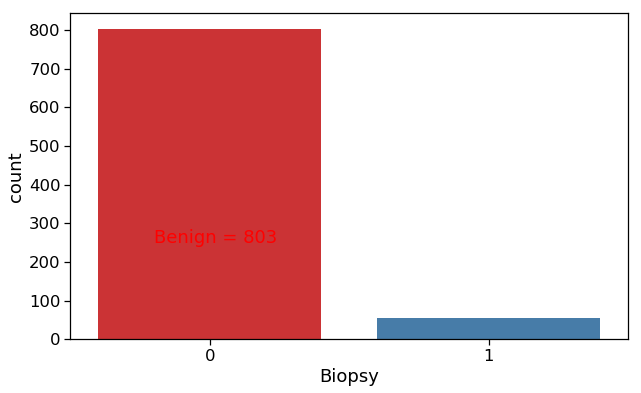

In [ ]:
# The frequency of cancer stages
B,M=data['Biopsy'].value_counts()
print('Number of Malignant : ', M)
print('Number of Benign: ', B)

plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot('Biopsy',data=data, palette="Set1")
plt.annotate('Benign = 803', xy=(-0.2, 250), xytext=(-0.2, 250), size=18, color='red')
plt.annotate('Malignant = 55', xy=(0.8, 250), xytext=(0.8, 250), size=18, color='w');


In [ ]:
data['Biopsy'].value_counts()


0    803
1     55
Name: Biopsy, dtype: int64

In [ ]:
#data0.columns or
data.keys()

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
data[features].mean()

Age                                   26.820513
Number of sexual partners              2.451049
First sexual intercourse              16.856643
Num of pregnancies                     2.127040
Smokes                                 0.143357
Smokes (years)                         1.201241
Smokes (packs/year)                    0.446278
Hormonal Contraceptives                0.560606
Hormonal Contraceptives (years)        1.972394
IUD                                    0.096737
IUD (years)                            0.444604
STDs                                   0.092075
STDs (number)                          0.155012
STDs:condylomatosis                    0.051282
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.004662
STDs:vulvo-perineal condylomatosis     0.050117
STDs:syphilis                          0.020979
STDs:pelvic inflammatory disease       0.001166
STDs:genital herpes                    0.001166
STDs:molluscum contagiosum             0

In [ ]:
stdX = (data[features] - data[features].mean()) / (data[features].std())

In [ ]:
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="Biopsy",
                    var_name="features",
                    value_name='value')

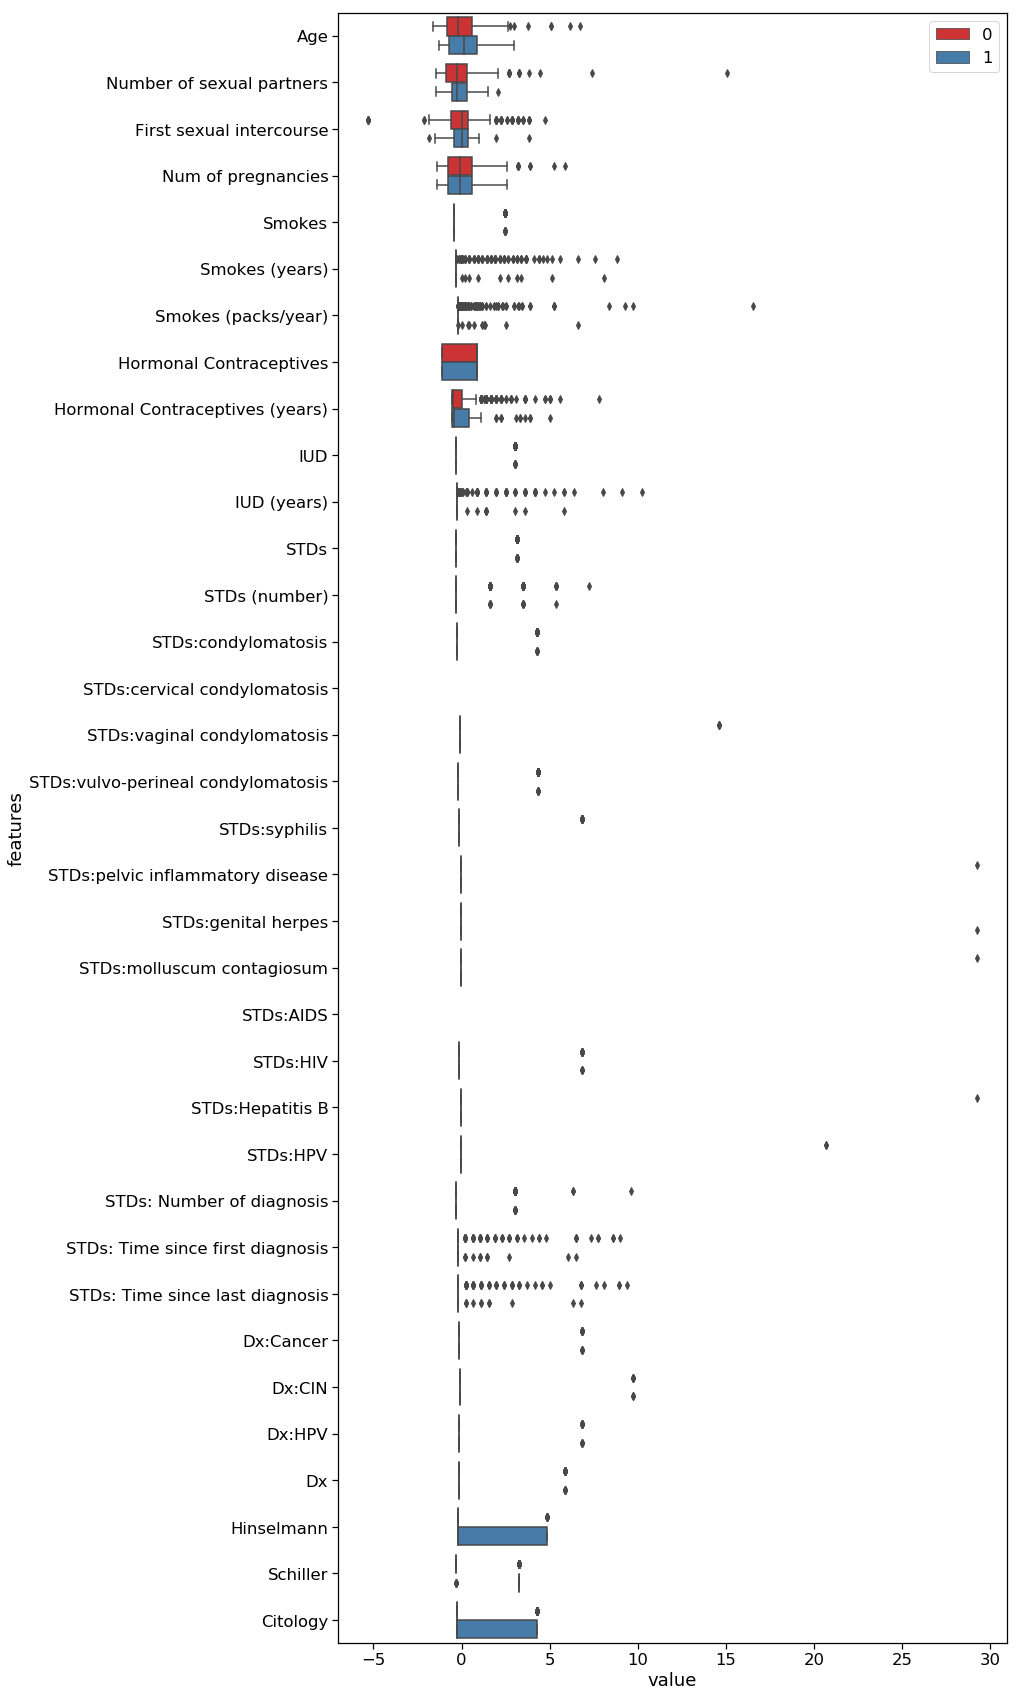

In [ ]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", hue="Biopsy", data=data_st, palette='Set1')
plt.legend(loc='best');

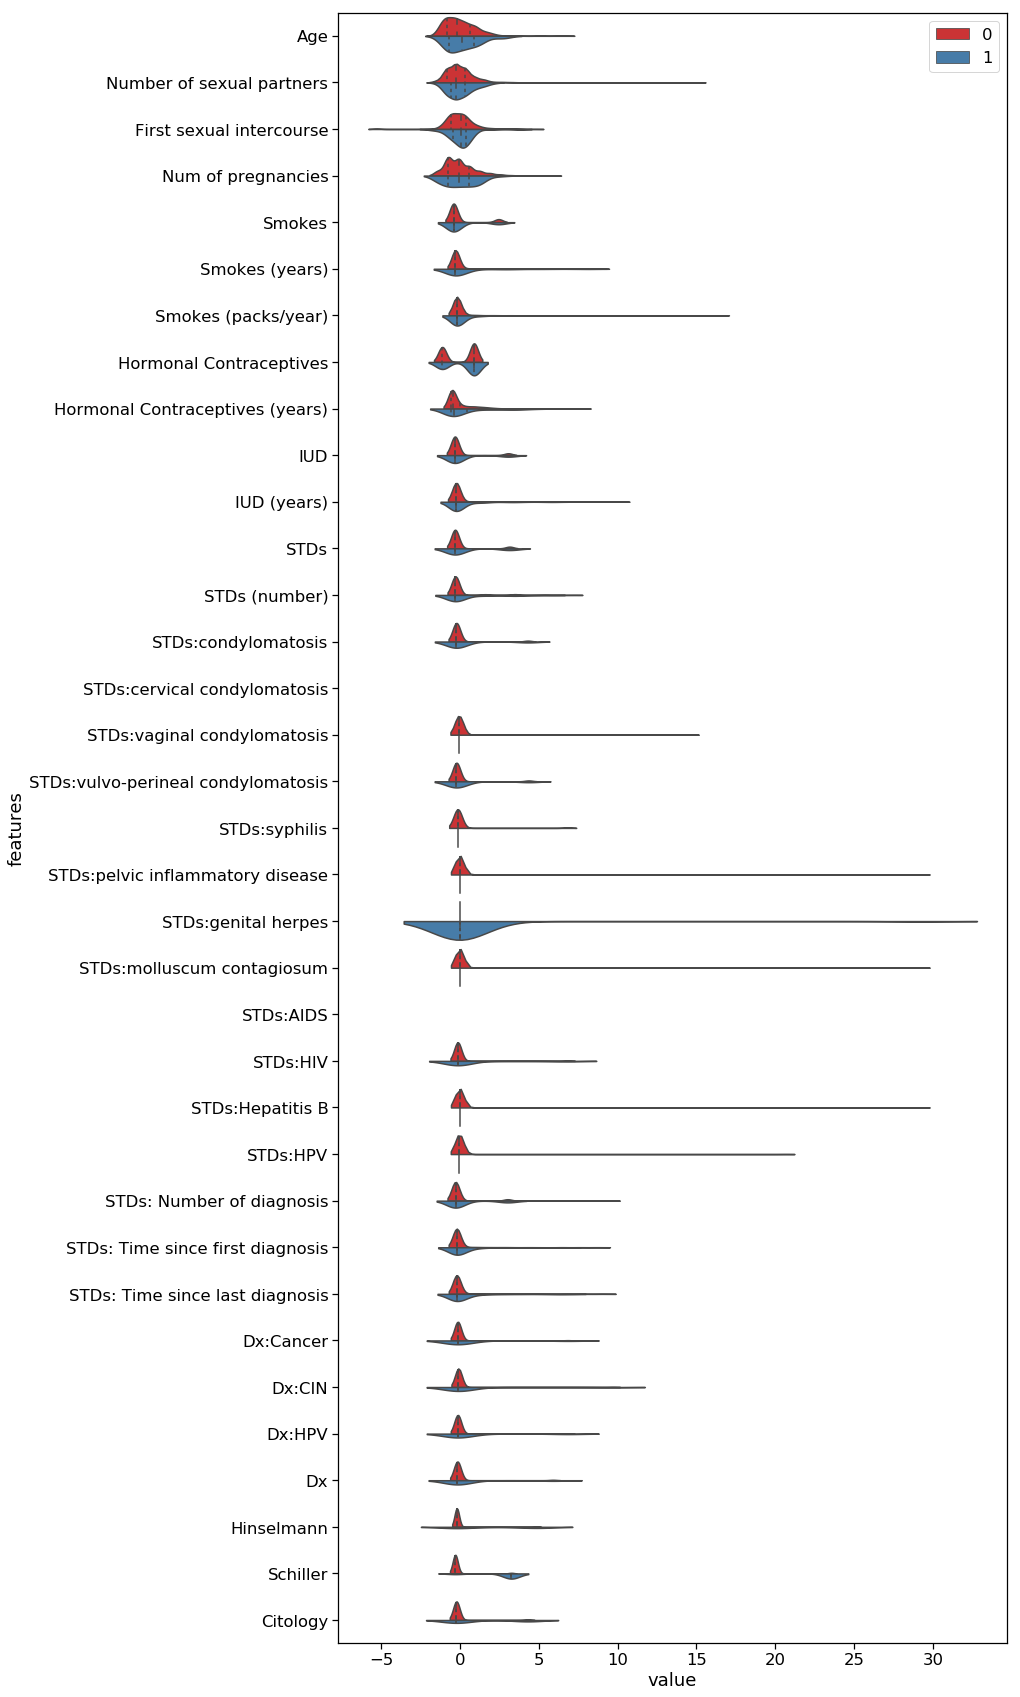

In [ ]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.violinplot(x="value", y="features", hue="Biopsy", data=data_st,split=True,
               inner="quart", palette='Set1')
plt.legend(loc='best');

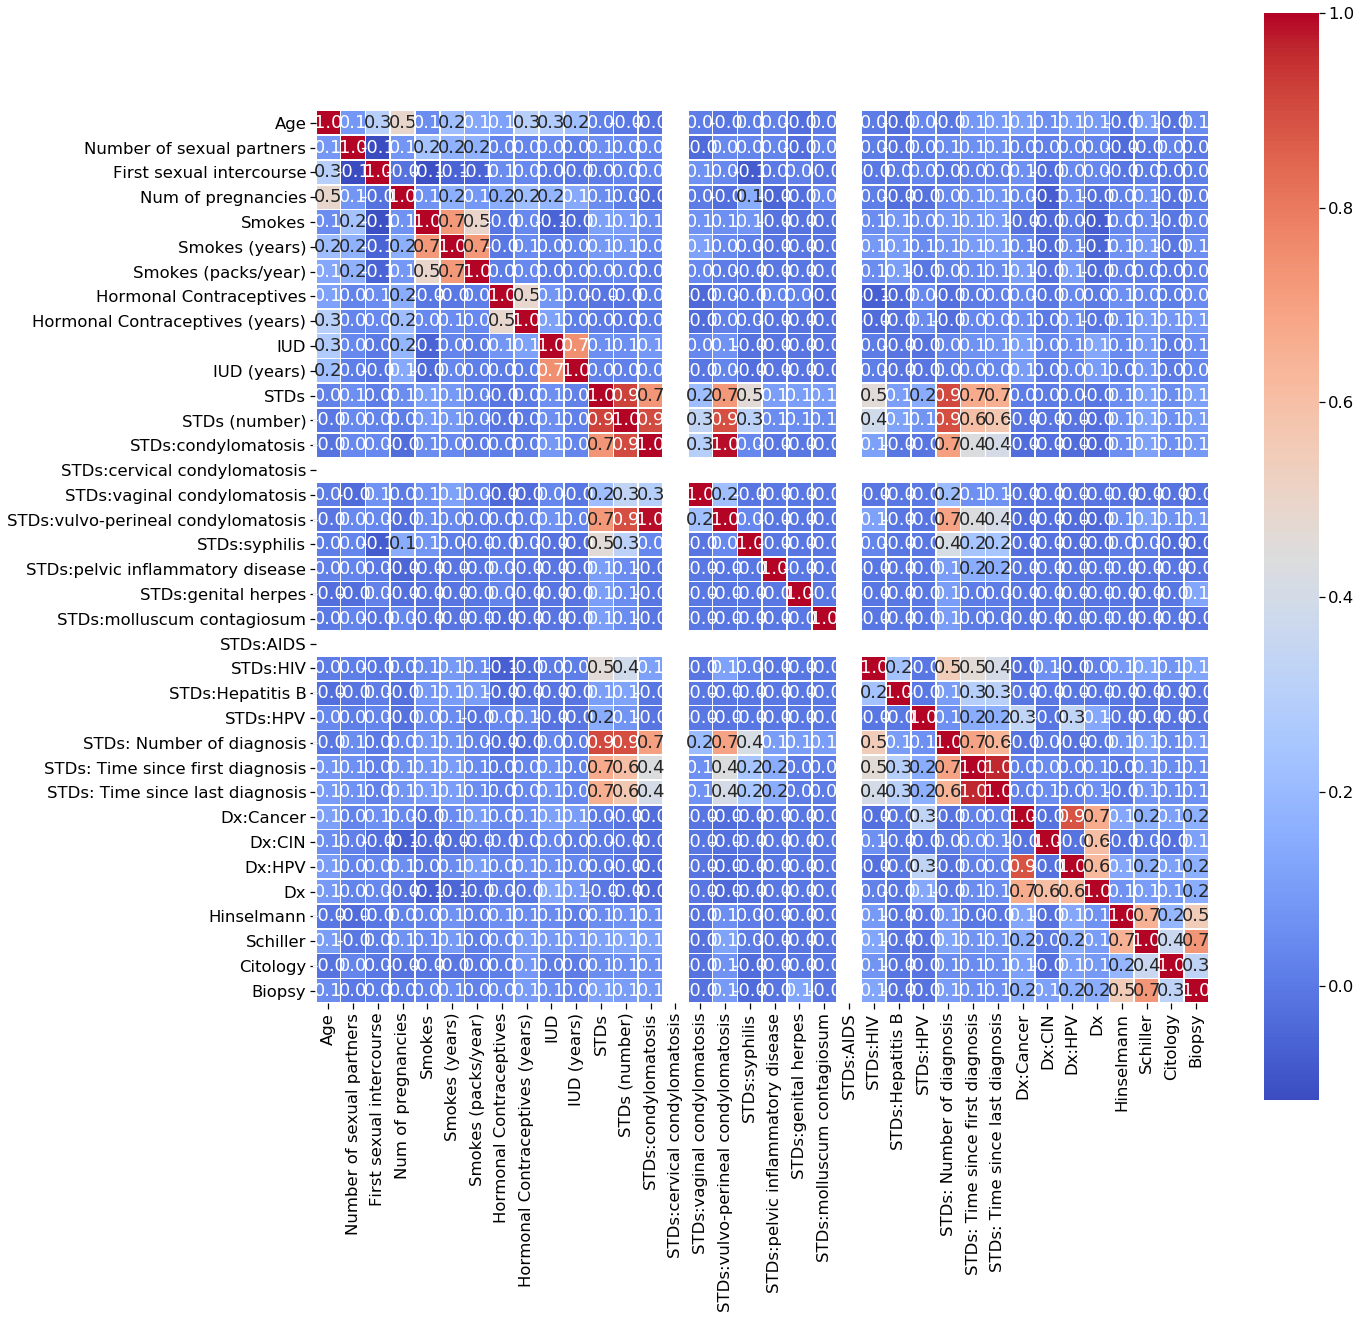

In [ ]:
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f',
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax);

In [ ]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
def pearson_r(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for 'radius_mean', 'symmetry_mean'
r1 = pearson_r(data['Schiller'], data['Citology'])
r2= pearson_r(data['Schiller'], data['Citology'])

name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(data.iloc[:,1], data.iloc[:,j])
        if abs(r) >= 0.80 and data.columns[j]  not in name_c:
                    name_c.append(data.columns[j])
print()
print('* Lenght of columns assuming r >=0.80:', len(name_c))
print('name_c =',name_c)


* Lenght of columns assuming r >=0.80: 1
name_c = ['Number of sexual partners']


/home/rachel/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/rachel/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(data.iloc[:,1], data.iloc[:,j])
        if abs(r) <= 0.40 and data.columns[j]  not in name_c:
                    name_c.append(data.columns[j])

print('* Lenght of columns assuming r <=0.40:', len(name_c))
print('name_c =',name_c)


* Lenght of columns assuming r <=0.40: 27
name_c = ['First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV']


Uncorrelated data are poentially more useful: discrimentory!


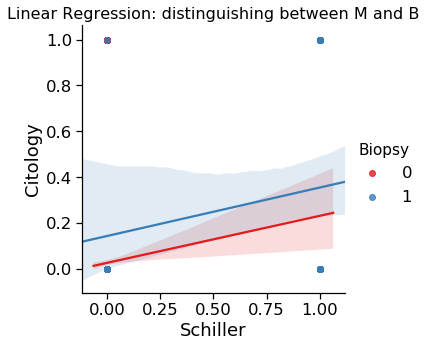

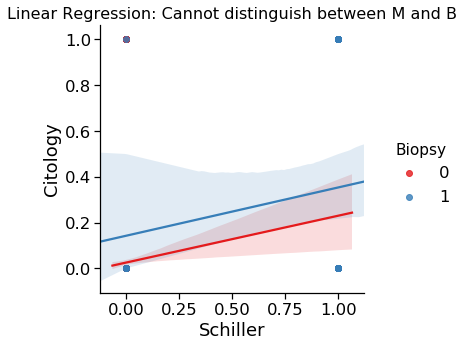

In [ ]:
sns.lmplot(x='Schiller', y= 'Citology', data = data, hue ='Biopsy',
           palette='Set1')
plt.title('Linear Regression: distinguishing between M and B', size=16)


sns.lmplot(x='Schiller', y= 'Citology', data = data, hue ='Biopsy',
           palette='Set1')
plt.title('Linear Regression: Cannot distinguish between M and B', size=16);

print('Uncorrelated data are poentially more useful: discrimentory!')

In [ ]:
# Let's map diagnosis column[object] to integer value:0, 1
# later on below I show how to use LabelEncoder(): it is better way to categorize
data=data.copy()
data['Biopsy']=data['Biopsy'].map({'M':1,'B':0})

In [ ]:
data.dropna()
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,NaN
1,15,1,14,1,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,NaN
2,34,1,0,1,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,NaN
3,52,5,16,4,1,37.000000,37.00,1,3.00,0,...,0,0,1,0,1,0,0,0,0,NaN
4,46,3,21,4,0,0.000000,0.00,1,15.00,0,...,0,0,0,0,0,0,0,0,0,NaN
5,42,3,23,2,0,0.000000,0.00,0,0.00,0,...,0,0,0,0,0,0,0,0,0,NaN
6,51,3,17,6,1,34.000000,3.40,0,0.00,1,...,0,0,0,0,0,0,1,1,0,NaN
7,26,1,26,3,0,0.000000,0.00,1,2.00,1,...,0,0,0,0,0,0,0,0,0,NaN
8,45,1,20,5,0,0.000000,0.00,0,0.00,0,...,0,0,1,0,1,1,0,0,0,NaN
9,44,3,15,0,1,1.266973,2.80,0,0.00,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
# Split the data into train (0.7) and test (0.3)

## all data without dropping those with correlations
X = data.drop('Biopsy', axis=1)
y = data['Biopsy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
print(type(X))
print(type(y))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').